In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.stats.proportion as sp

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Travel.csv")

In [3]:
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [7]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [13]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df.replace("Fe Male","Female",inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [15]:
df['DurationOfPitch'].isnull().value_counts(normalize=True)

DurationOfPitch
False    0.94865
True     0.05135
Name: proportion, dtype: float64

In [23]:
for col in df.columns:
    print(f"{col} : {df[col].isnull().value_counts(normalize=True)}\n")

CustomerID : CustomerID
False    1.0
Name: proportion, dtype: float64

ProdTaken : ProdTaken
False    1.0
Name: proportion, dtype: float64

Age : Age
False    0.953764
True     0.046236
Name: proportion, dtype: float64

TypeofContact : TypeofContact
False    0.994885
True     0.005115
Name: proportion, dtype: float64

CityTier : CityTier
False    1.0
Name: proportion, dtype: float64

DurationOfPitch : DurationOfPitch
False    0.94865
True     0.05135
Name: proportion, dtype: float64

Occupation : Occupation
False    1.0
Name: proportion, dtype: float64

Gender : Gender
False    1.0
Name: proportion, dtype: float64

NumberOfPersonVisiting : NumberOfPersonVisiting
False    1.0
Name: proportion, dtype: float64

NumberOfFollowups : NumberOfFollowups
False    0.990794
True     0.009206
Name: proportion, dtype: float64

ProductPitched : ProductPitched
False    1.0
Name: proportion, dtype: float64

PreferredPropertyStar : PreferredPropertyStar
False    0.994681
True     0.005319
Name: proport

In [36]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

In [41]:
cat_col

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [38]:
num_col

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

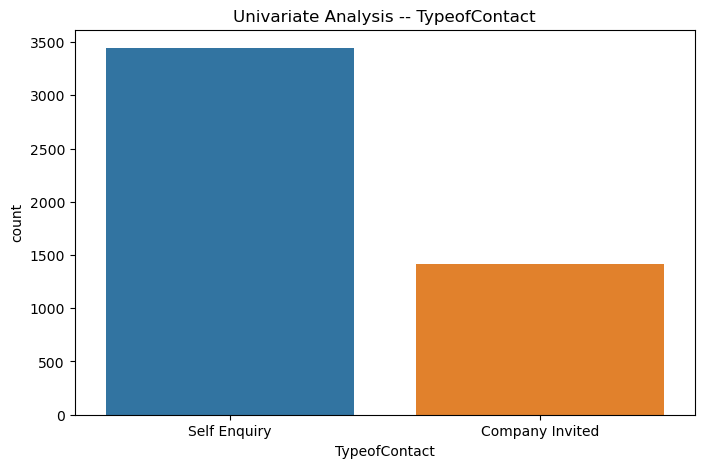

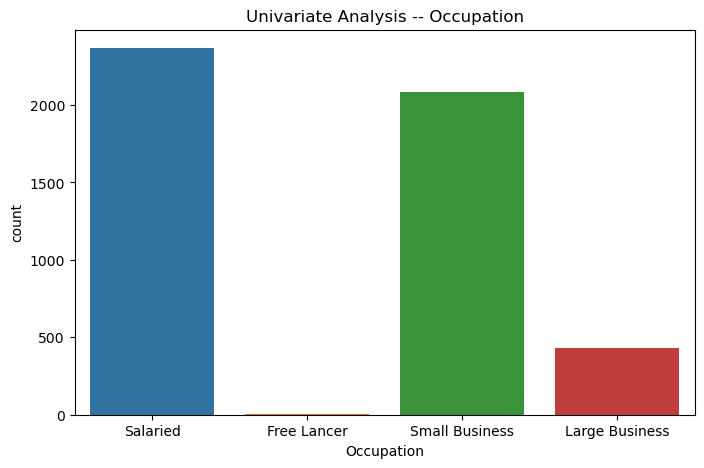

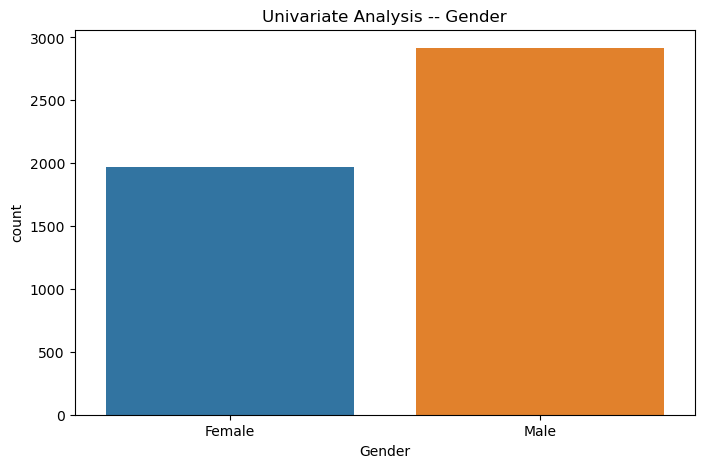

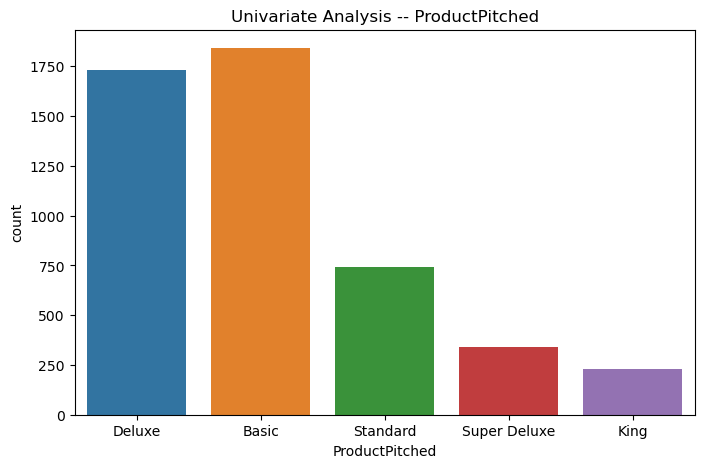

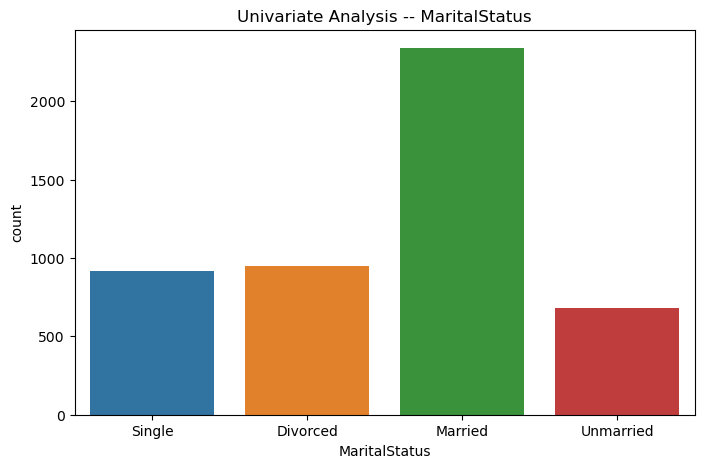

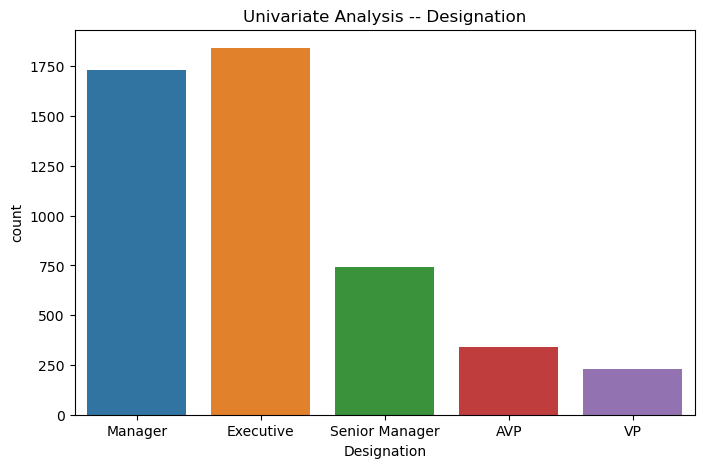

In [43]:
for column in cat_col:
    plt.figure(figsize = (8, 5))
    plt.title(f"Univariate Analysis -- {column}")
    sns.countplot(x=column,data=df)
    plt.show()

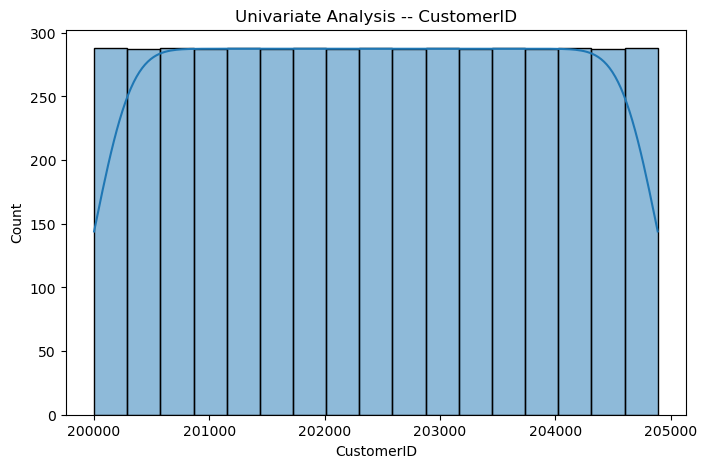

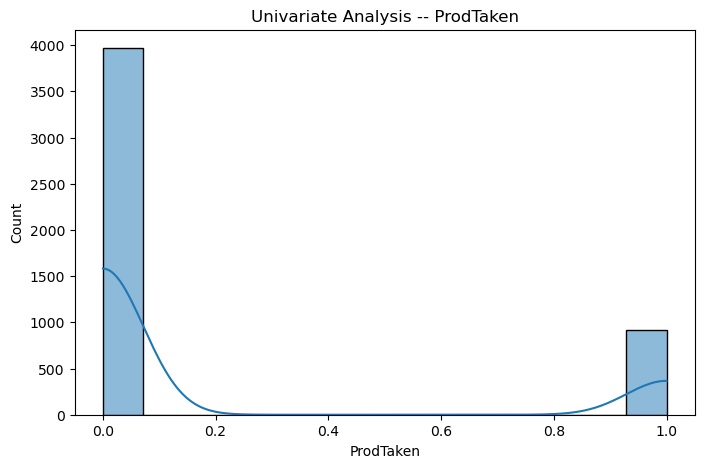

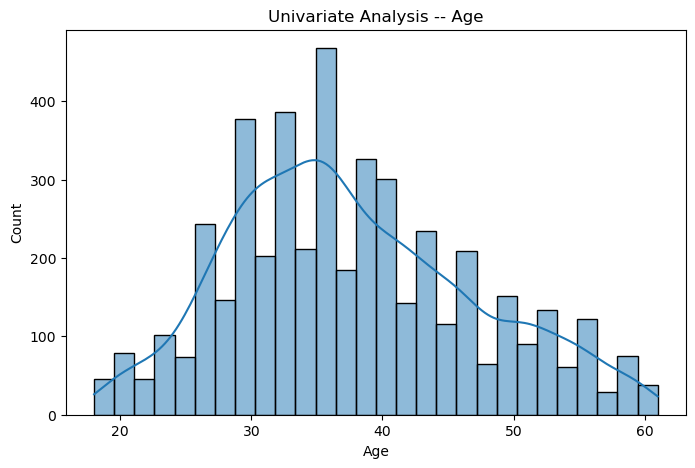

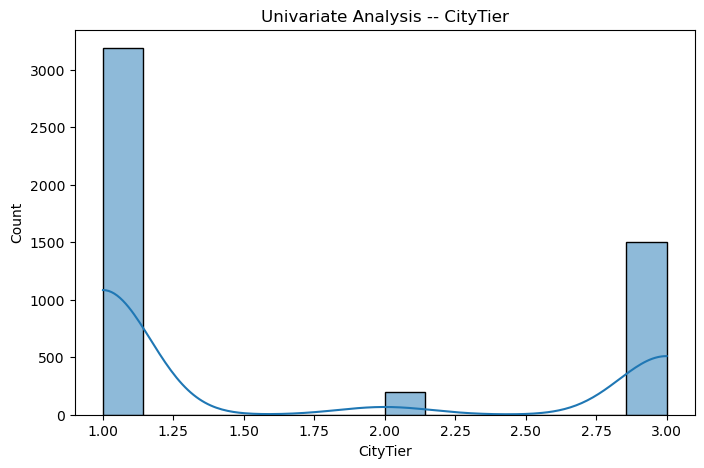

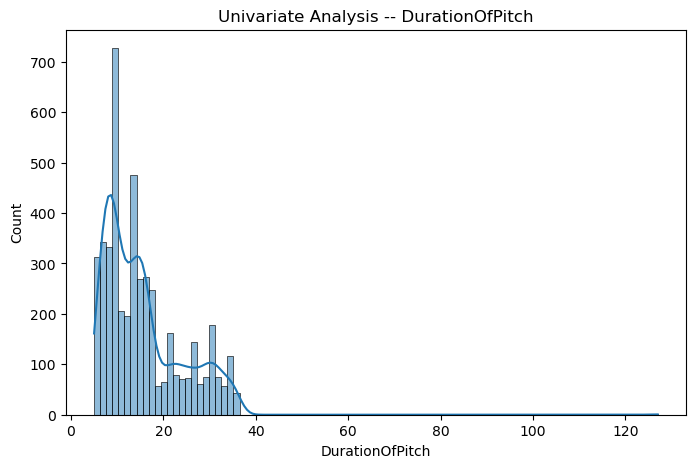

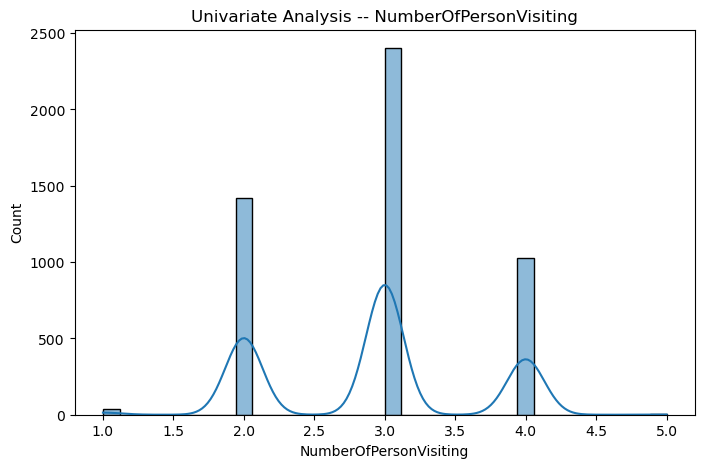

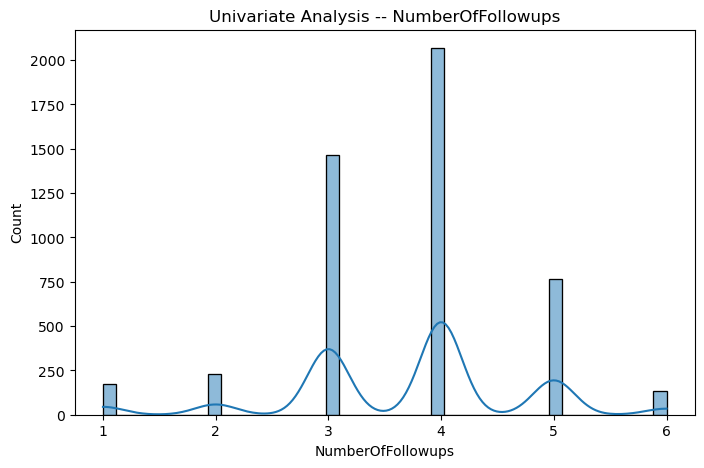

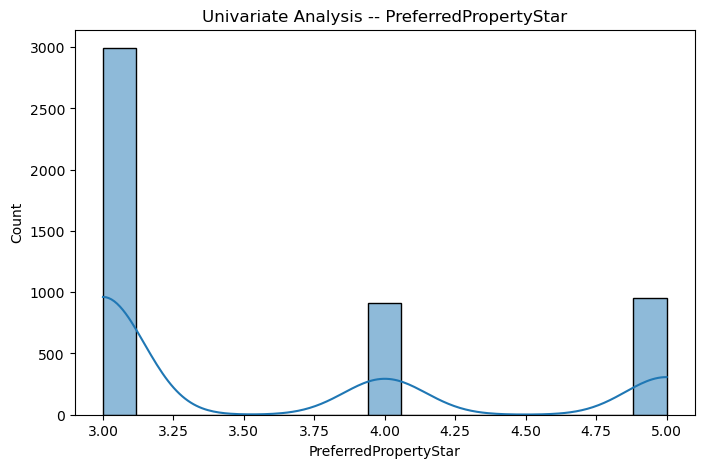

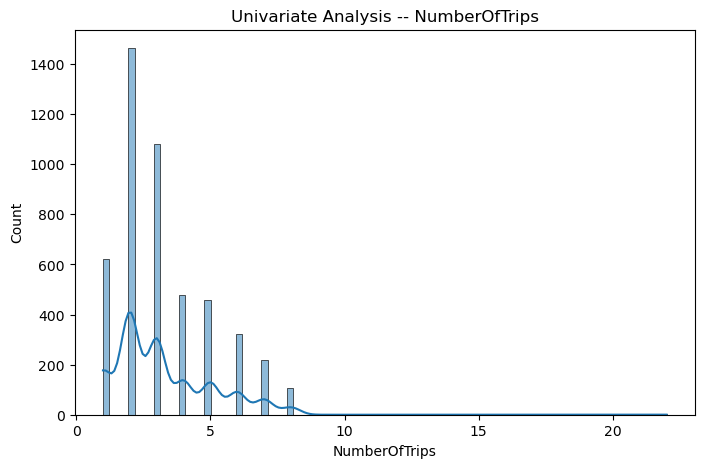

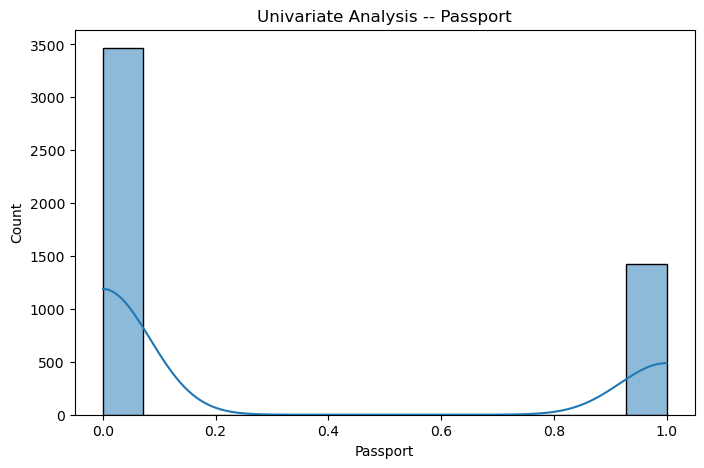

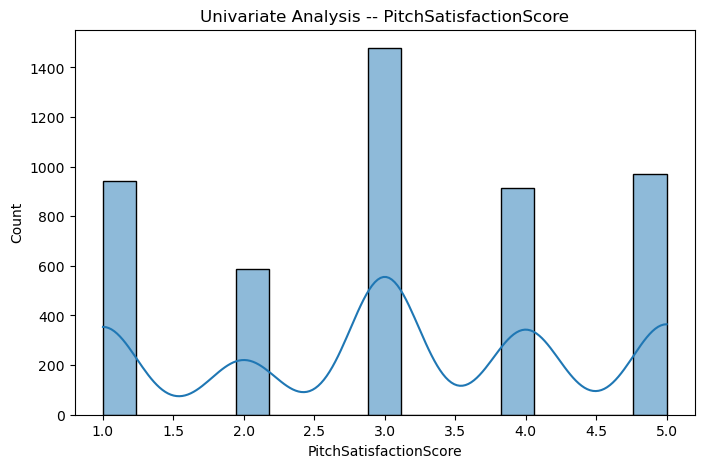

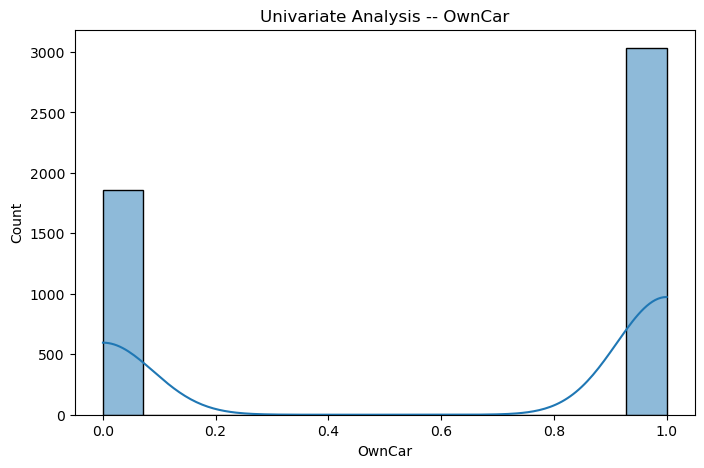

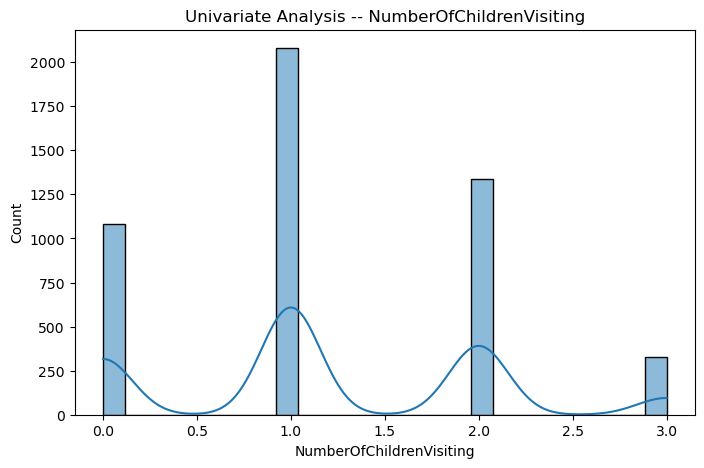

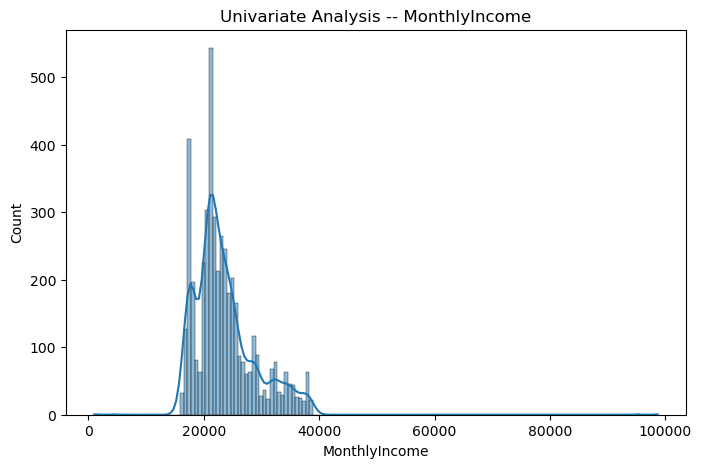

In [45]:
for column in num_col:
    plt.figure(figsize = (8, 5))
    plt.title(f"Univariate Analysis -- {column}")
    sns.histplot(x=column,data=df,kde=True)
    plt.show()

In [49]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [50]:
for i in df[cat_col].columns:
    x = df[i].unique()
    print(f"{i}: {x}")
    print()

TypeofContact: ['Self Enquiry' 'Company Invited' nan]

Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender: ['Female' 'Male']

ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']

Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



<Axes: xlabel='Age', ylabel='DurationOfPitch'>

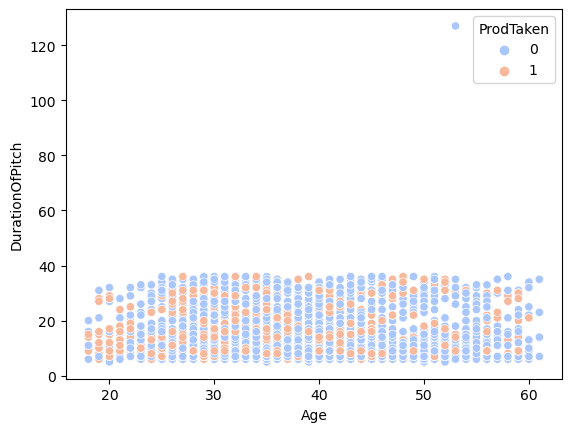

In [51]:
sns.scatterplot(x = 'Age', y = 'DurationOfPitch', data=df, hue='ProdTaken', palette = "coolwarm")

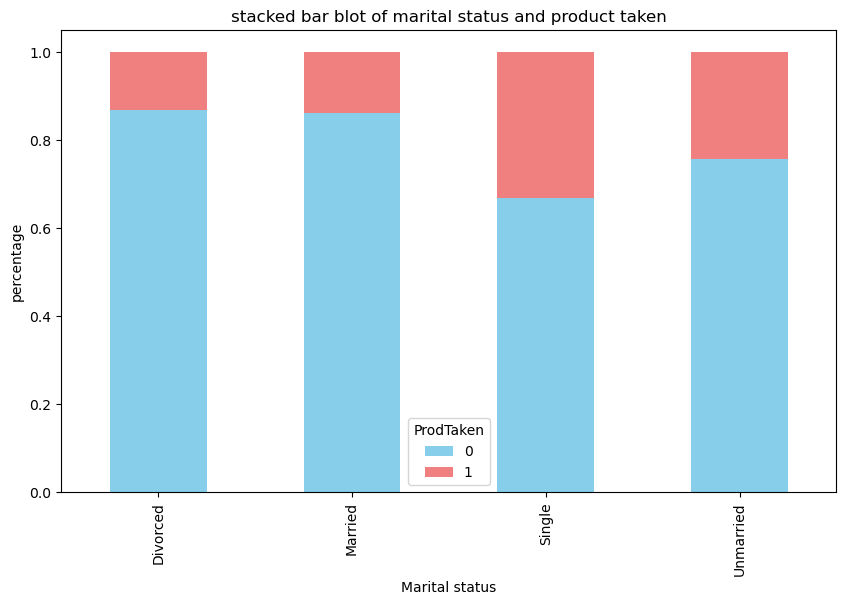

In [60]:
cross_tab = pd.crosstab(df['MaritalStatus'], df['ProdTaken'], normalize = 'index')
cross_tab.plot(kind = 'bar', stacked=True, color = ['skyblue', 'lightcoral'], figsize = (10, 6))
plt.title("stacked bar blot of marital status and product taken")
plt.xlabel("Marital status")
plt.ylabel('percentage')
plt.show()

In [61]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='ProductPitched', ylabel='PitchSatisfactionScore'>

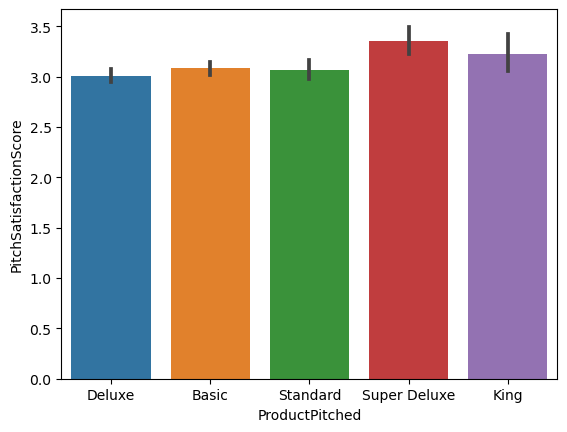

In [62]:
sns.barplot(x = 'ProductPitched', y = 'PitchSatisfactionScore', data=df)

<Axes: xlabel='NumberOfFollowups', ylabel='PitchSatisfactionScore'>

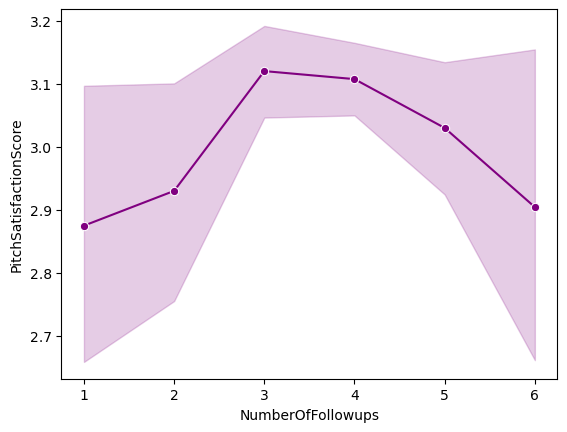

In [63]:
sns.lineplot(x = 'NumberOfFollowups', y = 'PitchSatisfactionScore', data = df, marker = 'o', color = 'purple')

<Axes: xlabel='ProdTaken', ylabel='Age'>

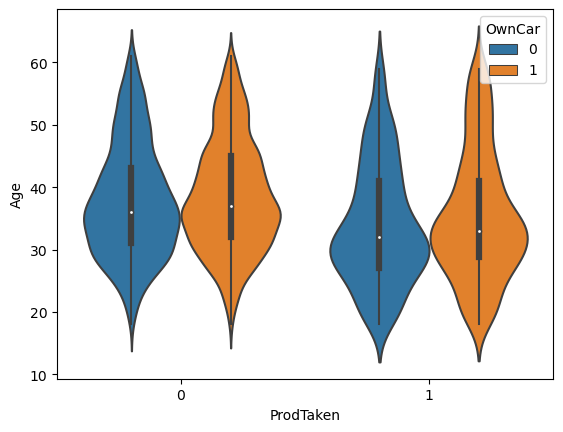

In [64]:
sns.violinplot(x='ProdTaken', y="Age", data = df, hue = "OwnCar")

<Axes: xlabel='Gender', ylabel='Age'>

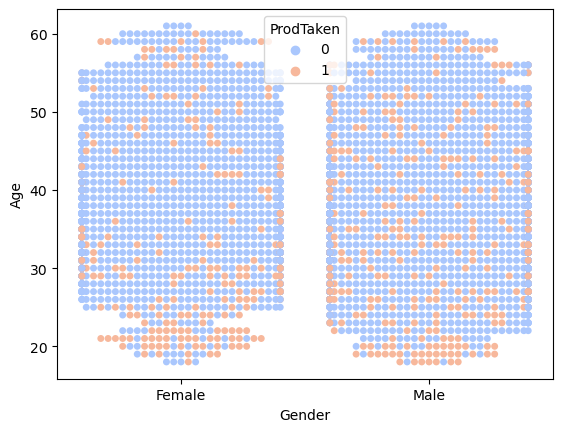

In [67]:
sns.swarmplot(x = "Gender", y="Age", data = df, hue = "ProdTaken", palette = "coolwarm")

<Axes: xlabel='Gender', ylabel='Age'>

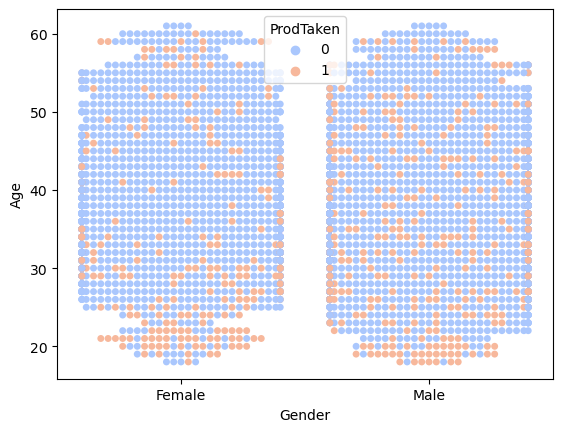

In [68]:
sns.swarmplot(x = "Gender", y="Age", data = df, hue = "ProdTaken", palette = "coolwarm")